<a href="https://colab.research.google.com/github/gabriel-afd/2-dataTransform_Python/blob/main/dataTransform_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py

import tabula
import pandas as pd
import zipfile
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 65.2 MB/s eta 0:00:00


In [ ]:
pdf_path = "Anexo_I_Rol_2021RN_465.2021_RN627L.2024.pdf"
csv_filename="tabelas.csv"
zip_filename="Teste_GabrielMedeiros.zip"

In [ ]:
#Extração dos dados do PDF
tabelas = tabula.read_pdf(pdf_path,pages='all', multiple_tables=True, lattice=True)

#Juntar todas as tabelas em um único DataFrame
df_total = pd.concat(tabelas,ignore_index=True)

Apr 01, 2025 2:43:46 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Apr 01, 2025 2:43:46 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



In [ ]:
df_total.head(10)

,Unnamed: 0,PROCEDIMENTO,RN\r(alteração),VIGÊNCIA,OD,AMB,HCO,HSO,REF,PAC,DUT,SUBGRUPO,GRUPO,CAPÍTULO
0,NaN,ACONSELHAMENTO GENÉTICO,NaN,NaN,NaN,AMB,HCO,HSO,REF,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
1,NaN,ATENDIMENTO/ACOMPANHAMENTO EM HOSPITAL-DIA PSI...,NaN,NaN,NaN,NaN,HCO,HSO,REF,NaN,109.0,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
2,NaN,ATENDIMENTO INTEGRAL AO RECÉM-NASCIDO (SALA DE...,NaN,NaN,NaN,NaN,HCO,NaN,REF,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
3,NaN,ATENDIMENTO MÉDICO DO INTENSIVISTA EM UTI GERA...,NaN,NaN,NaN,NaN,HCO,HSO,REF,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
4,NaN,ATENDIMENTO PEDIÁTRICO A GESTANTES (3o TRIMESTRE),NaN,NaN,NaN,AMB,HCO,NaN,REF,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
5,NaN,ATIVIDADE EDUCACIONAL PARA PLANEJAMENTO FAMILIAR,NaN,NaN,NaN,AMB,NaN,NaN,REF,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
6,NaN,ATIVIDADE EDUCATIVA EM SAÚDE BUCAL,NaN,NaN,OD,NaN,NaN,NaN,NaN,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
7,NaN,ATIVIDADE EDUCATIVA EM ODONTOLOGIA PARA PAIS E...,NaN,NaN,OD,NaN,NaN,NaN,NaN,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
8,NaN,CONDICIONAMENTO EM ODONTOLOGIA (COM DIRETRIZ D...,NaN,NaN,OD,NaN,NaN,NaN,NaN,NaN,86.0,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS
9,NaN,ESTABILIZAÇÃO DE PACIENTE POR MEIO DE CONTENÇÃ...,NaN,NaN,OD,NaN,NaN,NaN,NaN,NaN,NaN,"CONSULTAS, VISITAS HOSPITALARES OU\rACOMPANHAM...",PROCEDIMENTOS GERAIS,PROCEDIMENTOS GERAIS


In [ ]:
#Substituir siglas

sigla_map = {
    "OD": "Seg. Odontológica",
    "AMB": "Seg. Ambulatorial"
}

for col in df_total.columns:
  df_total[col] = df_total[col].replace(sigla_map)

In [ ]:
#Dimensão do DataFrame
df_total.shape

(3392, 14)

In [ ]:
#Verificação de campos nulos

df_total.isnull().sum()

,0
Unnamed: 0,3392
PROCEDIMENTO,0
RN\r(alteração),3343
VIGÊNCIA,3343
OD,3252
AMB,1693
HCO,136
HSO,170
REF,105
PAC,2922


) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


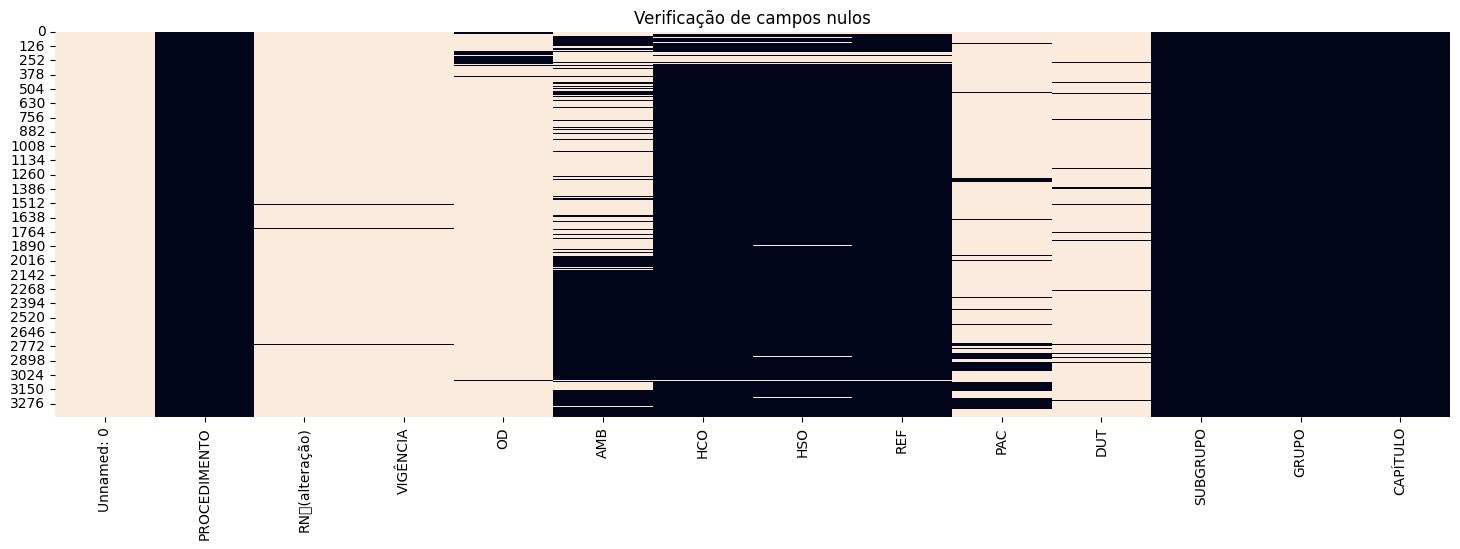

In [ ]:
#Verificação visual de campos nulos

import seaborn as sns;
import matplotlib.pyplot as plt;

plt.figure(figsize=(18,5))
plt.title("Verificação de campos nulos")
sns.heatmap(df_total.isnull(), cbar=False);


In [ ]:
#Todas as colunas Unnamed são null, portanto tal coluna pode ser removida sem prejudicar a integridade dos dados
if "Unnamed: 0" in df_total.columns:
  df_total = df_total.drop(columns=["Unnamed: 0"])

In [ ]:
#Salvando em CSV

df_total.to_csv("tabelas.csv", index=False, encoding="utf-8-sig")

In [ ]:
#Criando o arquivo ZIP

with zipfile.ZipFile(zip_filename,'w') as zipf:
  zipf.write(csv_filename)